<a href="https://colab.research.google.com/github/ananyagoyal1/Machine-Learning/blob/main/linear_regression_and_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model dataset: California Housing dataset
Number of attributes: 8
Number of instances: 20640

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


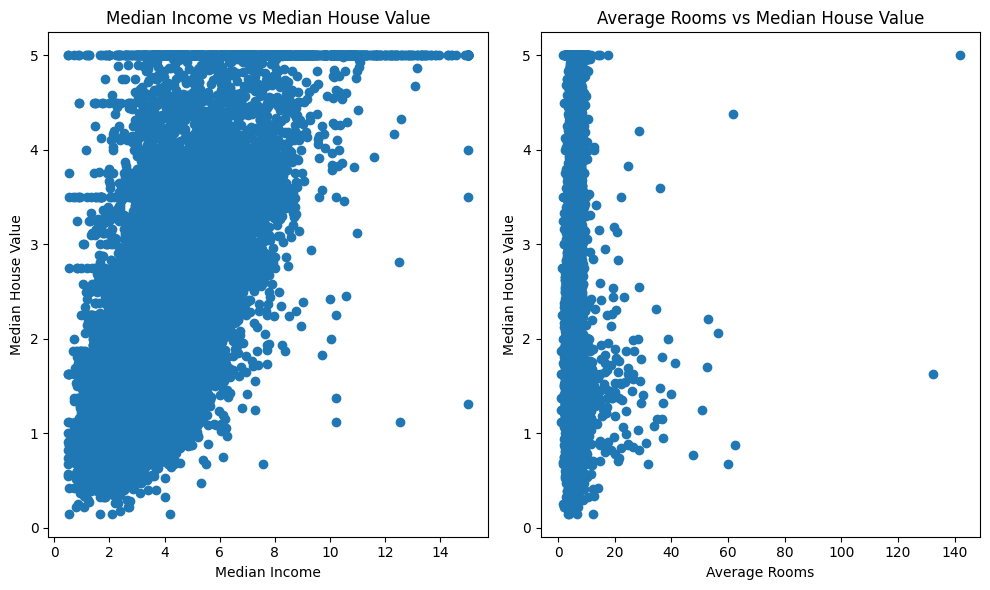


Missing Values:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


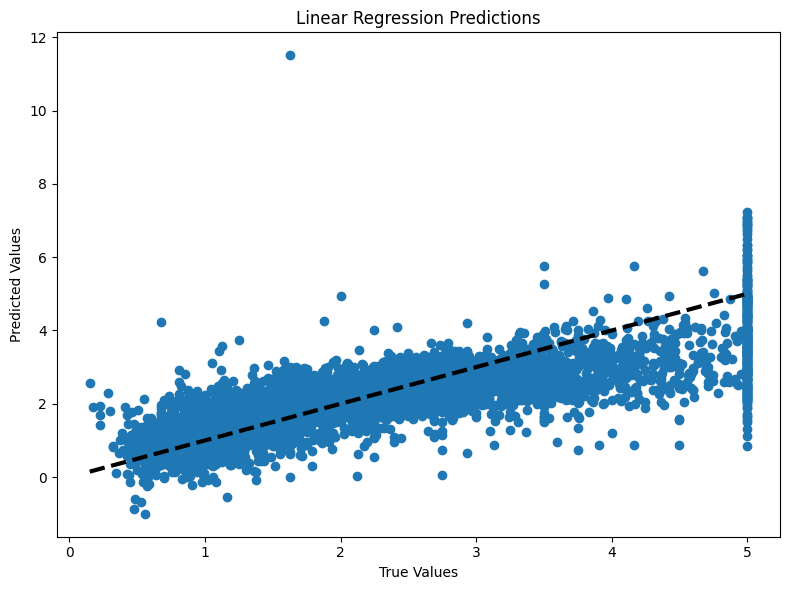


Linear Regression Coefficients:
      Feature   Coefficient
0      MedInc  4.458226e-01
1    HouseAge  9.681868e-03
2    AveRooms -1.220951e-01
3   AveBedrms  7.785996e-01
4  Population -7.757404e-07
5    AveOccup -3.370027e-03
6    Latitude -4.185367e-01
7   Longitude -4.336880e-01

Linear Regression Mean Squared Error: 0.5305677824766758


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

# Model dataset
print("Model dataset: California Housing dataset")

# Number of attributes
num_attributes = X.shape[1]
print("Number of attributes:", num_attributes)

# Number of instances
num_instances = X.shape[0]
print("Number of instances:", num_instances)

# 1. Load the dataset into Pandas data frame
df = X.copy()
df['MedHouseVal'] = y

# 2. Print the attributes/values/unique features of the dataset using any of the available methods
print("\nDataset Information:")
print(df.info())

# 3. Visualize the dataset using any two graphs
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['MedInc'], df['MedHouseVal'])
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

plt.subplot(1, 2, 2)
plt.scatter(df['AveRooms'], df['MedHouseVal'])
plt.title('Average Rooms vs Median House Value')
plt.xlabel('Average Rooms')
plt.ylabel('Median House Value')
plt.tight_layout()
plt.show()

# 4. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 6. Perform the training and test set split up using 70:30 and 80:20 ratios
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Perform training and predictions using LiR
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_preds = lin_reg.predict(X_test)

# 8. Plot the outputs
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lin_reg_preds)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.title('Linear Regression Predictions')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

# 9. Print the Regression Coefficients and Mean Squared Error
print("\nLinear Regression Coefficients:")
print(pd.DataFrame(zip(X.columns, lin_reg.coef_), columns=['Feature', 'Coefficient']))

lin_reg_mse = mean_squared_error(y_test, lin_reg_preds)
print("\nLinear Regression Mean Squared Error:", lin_reg_mse)

